<a href="https://colab.research.google.com/github/SalimZ04/UAV_MCV/blob/main/MOEAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYMOO** est une bibliothèque Python pour la résolution de problèmes d'optimisation multi-objectif. Elle implémente divers algorithmes d'optimisation multi-objectifs avec une interface simple et facile à utiliser. Pymoo est open source et est régulièrement mis à jour avec de nouvelles fonctionnalités et améliorations.

In [ ]:
# installation pymoo
pip install -U pymoo

In [ ]:
pip install --pre -U pymoo # pymoo candidat

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD # multi objective algo par decomposition
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

**SCATTER**  : un type de tracé ou de diagramme mathématique utilisant des coordonnées cartésiennes pour afficher les valeurs de généralement deux variables pour un ensemble de données. Si les points sont codés (couleur/forme/taille), une variable supplémentaire peut être affichée. Les données sont affichées sous la forme d'un ensemble de points, chacun ayant la valeur d'une variable déterminant la position sur l'axe horizontal et la valeur de l'autre variable déterminant la position sur l'axe vertical.

# Multi-objective: la solution perato par problemes.(get_problem)

    :ZDT1
    :ZDT2
    :ZDT3
    :ZDT4
    :ZDT6

In [ ]:
problem = get_problem("dtlz2") # Returns a 3-tuple with the objective function

ref_dirs = get_reference_directions("uniform", 3, n_partitions=12) #n_partitions qui détermine combien de points seront échantillonnés.


In [ ]:
algorithm = MOEAD(
    ref_dirs, #faire la distance entre points
    n_neighbors=12, # voisins des points
    prob_neighbor_mating=0.7,  #des points couples
)

In [ ]:
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1, #minimiser entre points
               verbose=False)  # verbose=True detecter specifique les points

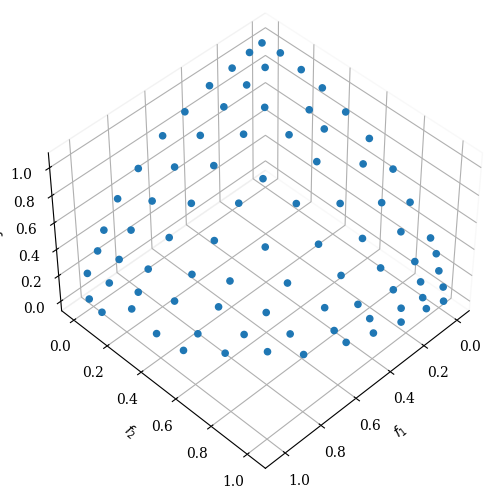

In [ ]:
Scatter().add(res.F).show()


In [ ]:
#plot = Scatter()
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
#plot.add(res.F, color="red")
#plot.show()

Multi-layer:
*Cette approche utilise l'idée de mettre à l'échelle différents simplexes. Cela nécessite que l'utilisateur définisse différentes couches, y compris la dimensionnalité n_dim, le numéro de partition n_partitions et la mise à l'échelle correspondante. Par exemple, pour trois dimensions, un biais vers le centre peut être obtenu comme suit :*

In [ ]:
ref_dirs = get_reference_directions(
    "multi-layer",
    #  get_reference_directions(name, *args, **kwargs)
    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=1.0), # n_partitions qui détermine combien de points seront échantillonnés.
    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=0.5)   
)
#Scaler qui est un moyen simple et rapide d'effectuer l'opération suivante sur un tableau de type
Scatter().add(ref_dirs).show()

In [ ]:
#plot = Scatter()
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.2)
#plot.add(ref_dirs, color="red")
#plot.show()

**Energy** : La solution potentielle minimale correspond à une distribution diversifiée de corps multiples dans l'espace physique tridimensionnel. Tout en traitant d'un multidimensionnel (s) de l'espace, on utilise une généralisation de l'énergie potentielle.

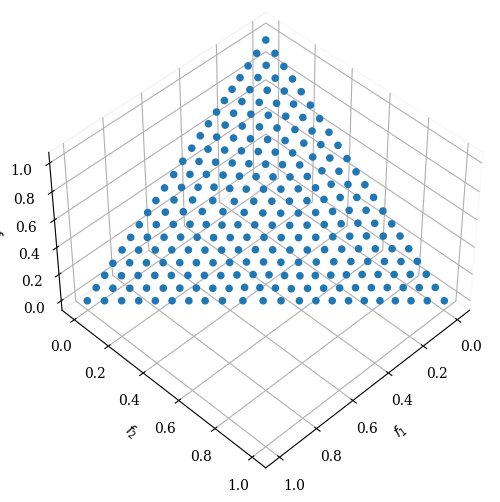

In [ ]:
ref_dirs = get_reference_directions("energy", 3, 250, seed=1)
Scatter().add(ref_dirs).show()



In [ ]:
#plot = Scatter()
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
#plot.add(ref_dirs, color="red")
#plot.show()

**das dennis** : permet de créer des directions de référence de manière très structurée. Les points peuvent être uniformément créés sur le simplexe unitaire en utilisant la méthode Das-Dennis.





In [ ]:
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.pcp import PCP


**PCP**: Pour les données de plus grande dimension, les tracés de coordonnées parallèles sont une technique puissante pour analyser la façon dont les solutions denses sont distribuées dans différentes plages concernant chaque coordonnée.

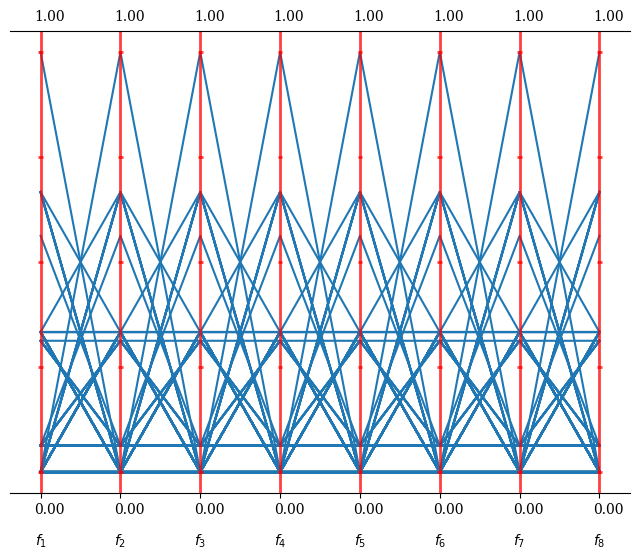

In [ ]:
ref_dirs = get_reference_directions(
    "multi-layer",
    get_reference_directions("das-dennis", 8, n_partitions=3, scaling=1.0),
    get_reference_directions("das-dennis", 8, n_partitions=2, scaling=0.5),
)

PCP().add(ref_dirs).show()

In [ ]:
#from pymoo.problems.many.dtlz import DTLZ1
#from pymoo.util.reference_direction import UniformReferenceDirectionFactory

#ref_dirs = UniformReferenceDirectionFactory(6, n_partitions=5)() * [2, 4, 8, 16, 32, 64]
#F = DTLZ1().pareto_front(ref_dirs)
#from pymoo.visualization.pcp import PCP
#PCP().add(F).show()
#plot = PCP()
#plot.set_axis_style(color="grey", alpha=0.5)
#plot.add(F, color="grey", alpha=0.3)
#plot.add(F[50], linewidth=5, color="red")
#plot.add(F[75], linewidth=5, color="blue")
#plot.show()

In [ ]:
plot = PCP(title=("Run", {'pad': 30}),
           n_ticks=10,
           legend=(True, {'loc': "upper left"}),
           labels=["profit", "cost", "sustainability", "environment", "satisfaction", "time"]
           )

plot.set_axis_style(color="grey", alpha=1)
plot.add(F, color="grey", alpha=0.3)
plot.add(F[50], linewidth=5, color="red", label="Solution A")
plot.add(F[75], linewidth=5, color="blue", label="Solution B")
plot.show()

**Layer-energy** : Une approche plus générique qui ne nécessite AUCUNE mise à l'échelle fournie par l'utilisateur consiste à utiliser la méthode Riesz s-Energy pour optimiser non pas directement les directions de référence, mais les mises à l'échelle.


In [ ]:
partitions = [3, 2, 1, 1]

ref_dirs = get_reference_directions("layer-energy", 8, partitions)
PCP().add(ref_dirs).show()

**MOEAd** Par Decomposition

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pymoo.util.misc import all_combinations

# nombre de points à utiliser pour le tracé
n_points = 100

#  xlim  matplotlib.pyplot.xlim(*args, **kwargs)[source]
P = np.linspace(0, 3, n_points)

# utilisé pour le meshgrid : Il faut d'abord générer des tableaux X et Y (noms arbitraires) 
# qui contiennent les valeurs des abscisses et ordonnées pour chacun des points grâce à la fonction meshgrid() 
X = all_combinations(P,P)

Plot_contour : est une technique graphique permettant de représenter une surface tridimensionnelle en traçant des tranches z constantes, appelées contours, sur un format bidimensionnel. C'est-à-dire que, étant donné une valeur pour z, des lignes sont tracées pour relier les coordonnées (x, y) où cette valeur z se produit.



In [88]:
def plot_contour(X, F):
    _X = X[:, 0].reshape((n_points,n_points))
    _Y = X[:, 1].reshape((n_points,n_points))
    _Z = F.reshape((n_points,n_points))

    fig, ax = plt.subplots()
    ax.contour(_X,_Y, _Z, colors='black')
    ax.arrow(0, 0, 2.5, 2.5, color='blue', head_width=0.1, head_length=0.1, alpha=0.4)
    ax.set_aspect('equal')

Et ensuite définir les poids à utiliser par les fonctions de décomposition :

In [89]:
weights = [0.5, 0.5]

Somme du  Poids 

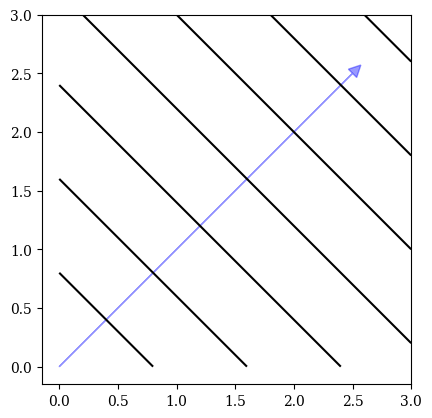

In [92]:
from pymoo.decomposition.weighted_sum import WeightedSum

dm = WeightedSum()
# X = all_combinations(P,P)
# plot_contour(X, F)
plot_contour(X, dm(X, weights=weights))

**PBI** : est une métrique qui mesure la distance entre le front de Pareto (ensemble de toutes les solutions non dominées) et le point de référence (un point défini par l'utilisateur qui représente la solution idéale).

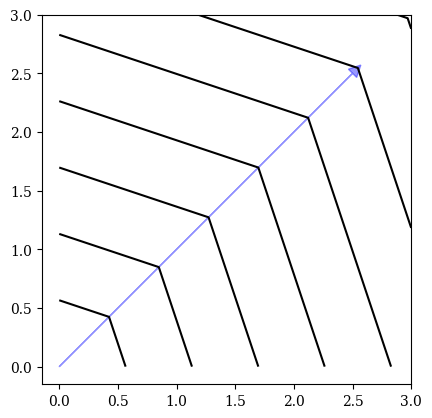

In [94]:
from pymoo.decomposition.pbi import PBI

dm = PBI(eps=0.0, theta=0.5)

plot_contour(X, dm(X, weights=weights))

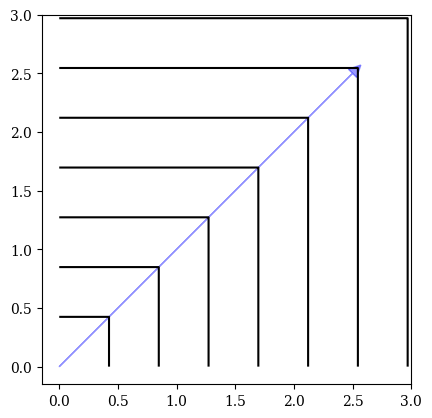

In [ ]:
dm = PBI(eps=0.0, theta=1.0)
plot_contour(X, dm(X, weights=weights))

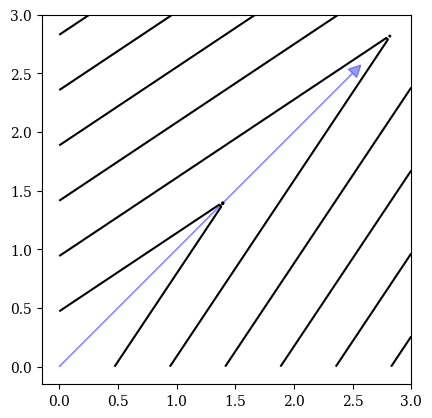

In [ ]:
dm = PBI(eps=0.0, theta=5.0)
plot_contour(X, dm(X, weights=weights))